# Importing Libraries and EDA

## Importing Libraries

In [1]:
# Data Manipulation and Linear Algebra
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
data = pd.read_csv("Placement_Data_Full_Class.csv")

placement = data.copy()
placement

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## Checking for Null Values

In [4]:
placement.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# Data Cleaning

## Handling Missing Values

In [5]:
placement['salary'].fillna(value=0, inplace=True)

placement.salary.isnull().sum()

0

## Dropping Unwanted Features

In [6]:
placement.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
placement

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Outliers

Text(0.5, 1.0, 'Employability percentage')

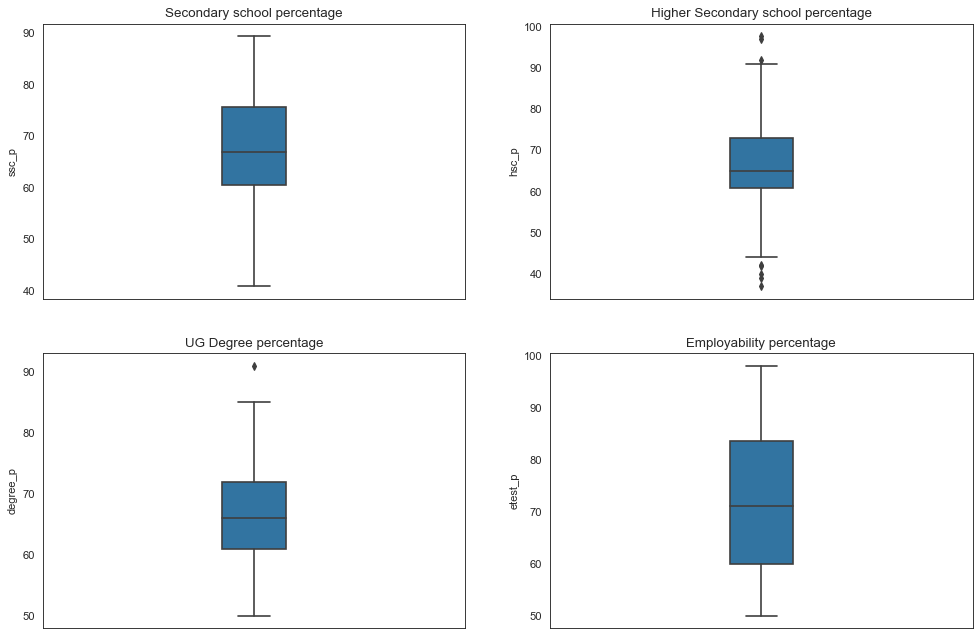

In [7]:
sns.set_style("white")
fig, axes = plt.subplots(figsize=(15, 10), dpi=80, nrows=2, ncols=2)

sns.boxplot(y=placement['ssc_p'], ax=axes[0,0], width=0.15)
axes[0,0].set_title('Secondary school percentage')

sns.boxplot(y=placement['hsc_p'], ax=axes[0,1], width=0.15)
axes[0,1].set_title('Higher Secondary school percentage')

sns.boxplot(y=placement['degree_p'], ax=axes[1,0], width=0.15)
axes[1,0].set_title('UG Degree percentage')

sns.boxplot(y=placement['etest_p'], ax=axes[1,1], width=0.15)
axes[1,1].set_title('Employability percentage')

## Finding Outliers and Removing Them

In [8]:
Q1 = placement['hsc_p'].quantile(0.25)
Q3 = placement['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

print(IQR)

12.100000000000001


In [9]:
outlier_filter = (placement['hsc_p'] >= Q1 - 1.5 * IQR) & (placement['hsc_p'] <= Q3 + 1.5 *IQR)

filtered_placement = placement.loc[outlier_filter]

Text(0.5, 1.0, 'After removing outliers(hsc_p)')

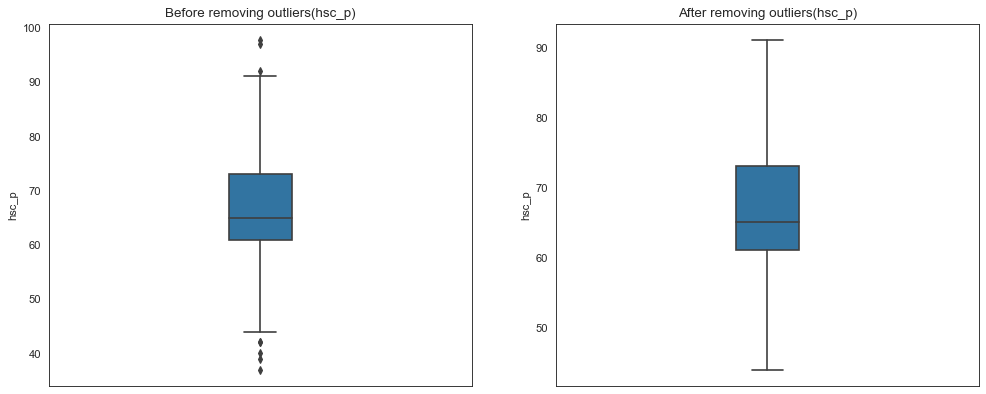

In [10]:
sns.set_style("white")
fig, axes = plt.subplots(figsize=(15, 6), dpi=80, nrows=1, ncols=2)

sns.boxplot(y=placement['hsc_p'], ax=axes[0], width=0.15)
axes[0].set_title('Before removing outliers(hsc_p)')

sns.boxplot(y=filtered_placement['hsc_p'], ax=axes[1], width=0.15)
axes[1].set_title('After removing outliers(hsc_p)')

# Data Visualization

## Count Plots

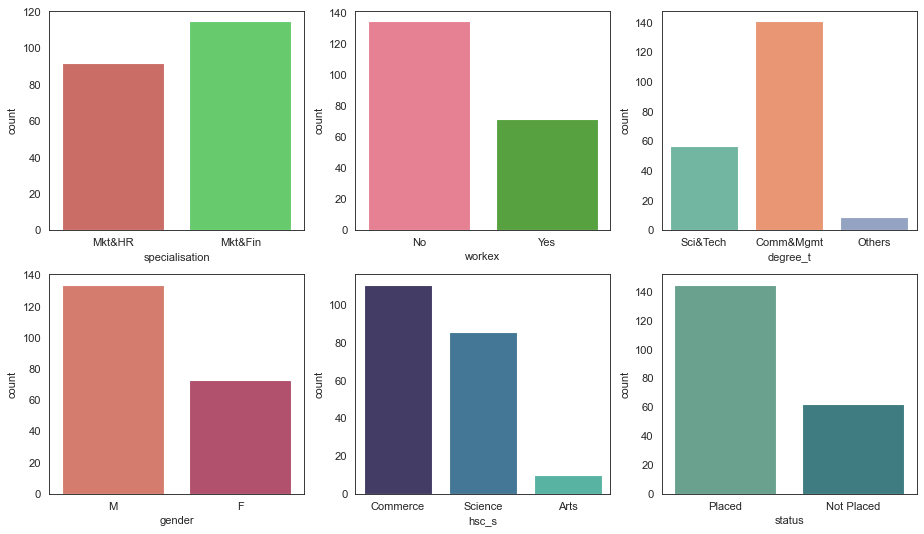

In [11]:
plt.figure(figsize = (14, 8), dpi=80)

cols = ["specialisation", "workex", "degree_t", "gender", "hsc_s", "status"]
color_palette = ["hls", "husl", "Set2", "flare", "mako", "crest"]

subplot_num = 231
for index, col in enumerate(cols):    
    plt.subplot(subplot_num)
    ax=sns.countplot(x=col, data=filtered_placement, palette=sns.color_palette(color_palette[index], 3))
    
    subplot_num += 1

## Distribution of Numberical Features

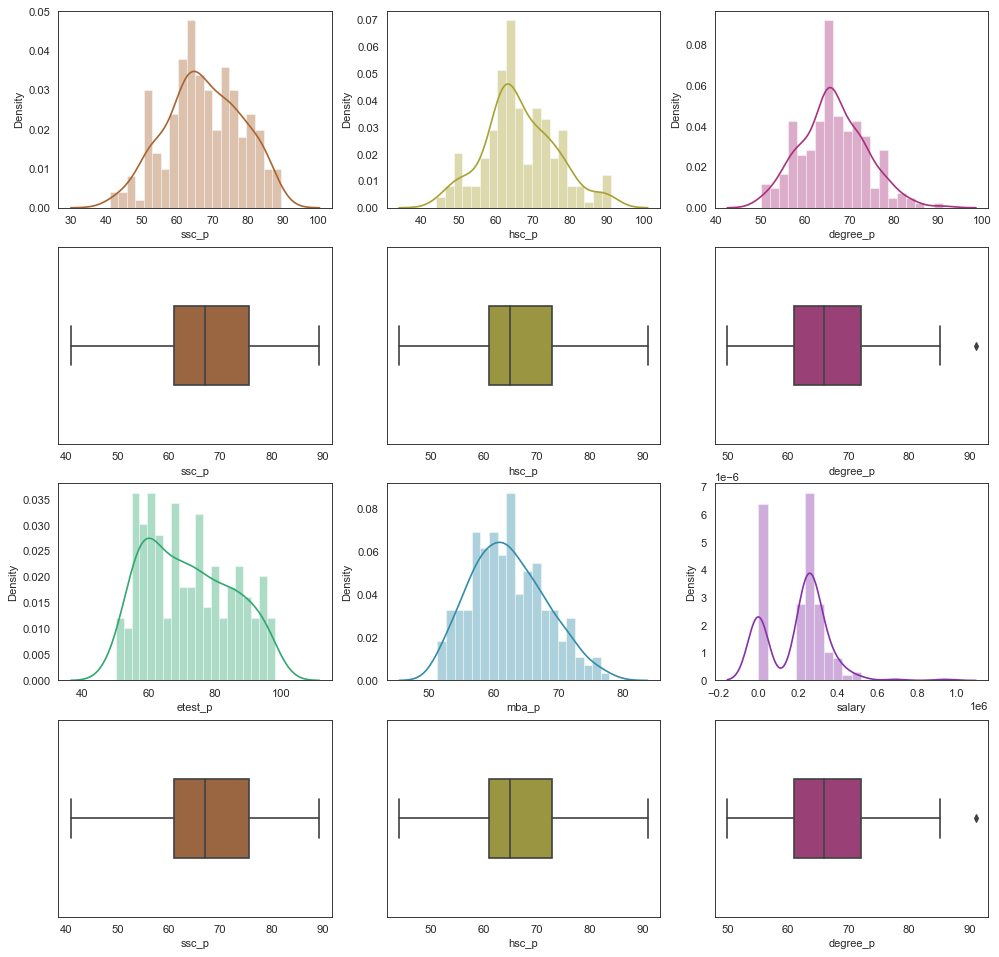

In [12]:
num_cols = filtered_placement.select_dtypes(include=np.number).columns.tolist()
colors = ["#a86432", "#a8a232", "#a8327b", "#32a871", "#328da8", "#8532a8"]

fig, axes = plt.subplots(figsize = (15, 15), dpi=80, nrows=4, ncols=3)

for i in range(0, 3):
    sns.distplot(filtered_placement[num_cols[i]], color=colors[i], bins=20, ax=axes[0, i])
    
for i in range(0, 3):
    sns.boxplot(filtered_placement[num_cols[i]], color=colors[i], ax=axes[1, i], width=0.4)
    
for i in range(0, 3):
    j = i + 3
    sns.distplot(filtered_placement[num_cols[j]], color=colors[j], bins=20, ax=axes[2, i])
    
for i in range(0, 3):
    j = i + 3
    sns.boxplot(filtered_placement[num_cols[i]], color=colors[i], ax=axes[3, i], width=0.4)

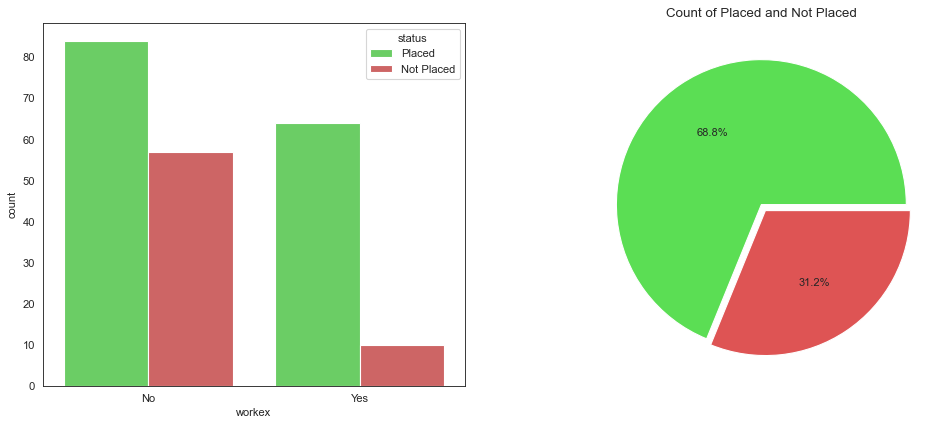

In [13]:
plt.figure(figsize=(15, 6), dpi=80)

plt.subplot(121)
sns.countplot(x="workex", hue="status", data=data, palette=['#5bde54',"#de5454"])

plt.subplot(122)
plt.pie(data.status.value_counts(), autopct='%.1f%%', colors=['#5bde54',"#de5454"], explode=[0, 0.05])
plt.title("Count of Placed and Not Placed")

plt.show()

## Specialisation vs Salary

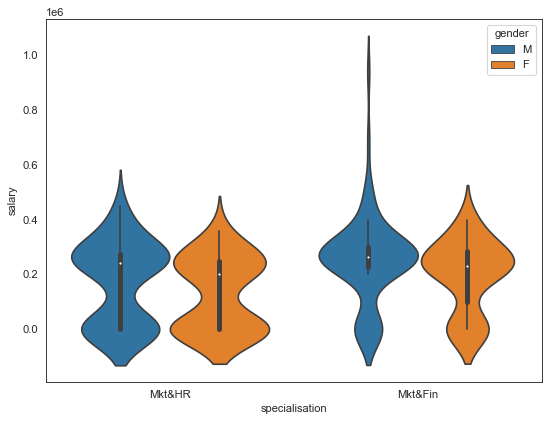

In [14]:
plt.figure(dpi=80, figsize=(8, 6))
sns.violinplot(x="specialisation", y="salary", hue="gender", data=filtered_placement)
plt.show()

## Correlation Heatmap

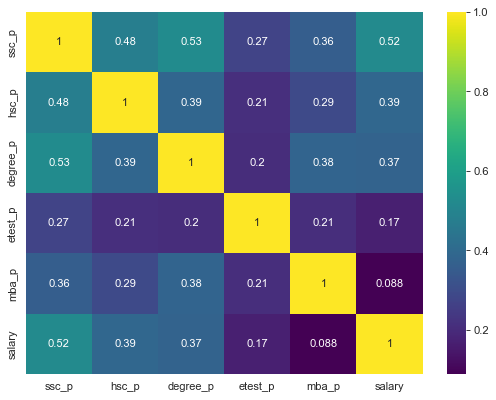

In [15]:
plt.figure(dpi=80, figsize=(8, 6))
sns.heatmap(filtered_placement.corr(), cmap="viridis", annot=True)
plt.show()

# Preparing Data

## Label Encoding

In [16]:
object_cols=['gender','workex','specialisation']

label_encoder = LabelEncoder()

for col in object_cols:
    filtered_placement[col] = label_encoder.fit_transform(filtered_placement[col])
    
filtered_placement.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,Placed,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,Placed,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,Placed,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,Not Placed,0.0
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,Placed,425000.0


## OneHot Encoding

In [17]:
ohe_features = pd.get_dummies(filtered_placement.drop("status", axis=1))

full_data = pd.concat([ohe_features, filtered_placement.status], axis=1).reset_index(drop=True)
full_data.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,salary,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,status
0,1,67.00,91.00,58.00,0,55.0,1,58.80,270000.0,0,1,0,0,0,1,Placed
1,1,79.33,78.33,77.48,1,86.5,0,66.28,200000.0,0,0,1,0,0,1,Placed
2,1,65.00,68.00,64.00,0,75.0,0,57.80,250000.0,1,0,0,1,0,0,Placed
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0.0,0,0,1,0,0,1,Not Placed
4,1,85.80,73.60,73.30,0,96.8,0,55.50,425000.0,0,1,0,1,0,0,Placed


In [18]:
# Dropping salary column
full_data.drop("salary", axis=1, inplace=True)

## Stratified Train Test Split
### Evenly Spreading the Dependent Variable "status" in Train and Test set

In [19]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(full_data, full_data['status']):
    train = full_data.loc[train_index]
    test = full_data.loc[test_index]

In [20]:
X_train = train.drop("status", axis=1)
y_train = train["status"]

X_test = test.drop("status", axis=1)
y_test = test["status"]

# Modeling

## Dataframe to store all the accuracy scores for Comparison and Analysis

In [21]:
MLA_compare = pd.DataFrame()

def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        # Training The Model
        classifier.fit(X_train, y_train)

        # KFold Accuracies on Training Data
        kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1)
        
        # Prediction on Testing Data
        y_pred = cross_val_predict(estimator = classifier, X = X_test, y = y_test, cv = 10, n_jobs=-1)
        
        # Accuracy for y_test and y_pred
        classifier_accuracy_score = accuracy_score(y_test, y_pred)

        # Saving Data in Dataframe
        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
        MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

        print(MLA_name, "Done")
        row_index+=1

In [22]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.LinearSVC(), 
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    XGBClassifier(eval_metric="logloss"),
    CatBoostClassifier(silent=True)  
    ]

MLA_testing(MLA=MLA, X_train=X_train, X_test=X_test)

AdaBoostClassifier Done
BaggingClassifier Done
ExtraTreesClassifier Done
GradientBoostingClassifier Done
RandomForestClassifier Done
GaussianProcessClassifier Done
LogisticRegressionCV Done
PassiveAggressiveClassifier Done
RidgeClassifierCV Done
SGDClassifier Done
Perceptron Done
BernoulliNB Done
GaussianNB Done
KNeighborsClassifier Done
LinearSVC Done
SVC Done
NuSVC Done
DecisionTreeClassifier Done
ExtraTreeClassifier Done
LinearDiscriminantAnalysis Done
QuadraticDiscriminantAnalysis Done
XGBClassifier Done
CatBoostClassifier Done


## Comparing Models
## Viewing Top 10 Best Performing Models

In [23]:
MLA_compare = MLA_compare.sort_values(by="K-Fold Accuracy", ascending=False).reset_index(drop=True)[:10]
MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,LinearDiscriminantAnalysis,83.333333,87.169118
1,ExtraTreesClassifier,73.809524,86.691176
2,XGBClassifier,85.714286,86.691176
3,KNeighborsClassifier,76.190476,86.102941
4,CatBoostClassifier,85.714286,85.477941
5,RandomForestClassifier,80.952381,85.477941
6,LogisticRegressionCV,80.952381,85.441176
7,NuSVC,71.428571,85.441176
8,RidgeClassifierCV,83.333333,85.441176
9,BaggingClassifier,78.571429,84.191176


<AxesSubplot:xlabel='K-Fold Accuracy', ylabel='MLA Name'>

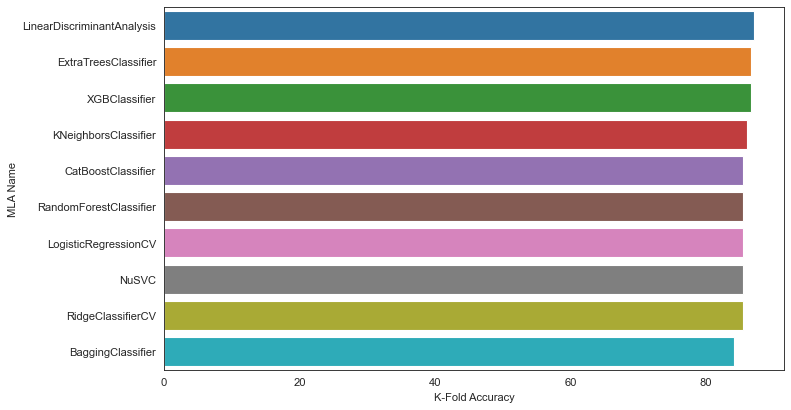

In [24]:
plt.figure(figsize=(10, 6), dpi=80)
sns.barplot(x="K-Fold Accuracy", y="MLA Name", data=MLA_compare)

<AxesSubplot:xlabel='Accuracy Score', ylabel='MLA Name'>

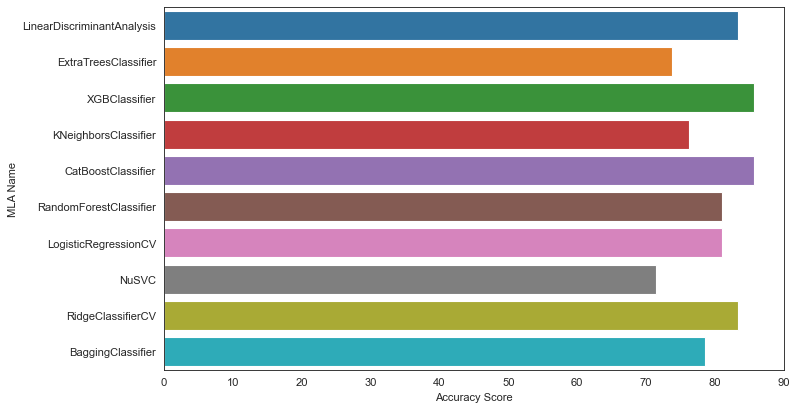

In [25]:
plt.figure(figsize=(10, 6), dpi=80)
sns.barplot(x="Accuracy Score", y="MLA Name", data=MLA_compare)

## RandomForestClassifier

In [26]:
def classification(classifier):
    # Training The Model
    classifier.fit(X_train, y_train)

    # KFold Accuracies on Training Data
    kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1)
    print("K-Fold Accuracy Score:\n", kfold_accuracy, "\n")
    print("Avg K-Fold Accuracy Score:", kfold_accuracy.mean(), "\n")

    # Prediction on Testing Data
    y_pred = cross_val_predict(estimator = classifier, X = X_test, y = y_test, cv = 10, n_jobs=-1)
            
    # Accuracy for y_test and y_pred
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score:", accuracy, "\n")

    # Confusion Matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")

    # Classification Report
    print(classification_report(y_test, y_pred))

In [27]:
rf_clf = ensemble.RandomForestClassifier()

classification(rf_clf)

K-Fold Accuracy Score:
 [0.88235294 0.88235294 0.82352941 0.88235294 0.88235294 0.9375
 0.875      0.9375     0.875      0.9375    ] 

Avg K-Fold Accuracy Score: 0.8915441176470589 

Accuracy Score: 0.8333333333333334 

Confusion Matrix:
 [[ 8  5]
 [ 2 27]] 

              precision    recall  f1-score   support

  Not Placed       0.80      0.62      0.70        13
      Placed       0.84      0.93      0.89        29

    accuracy                           0.83        42
   macro avg       0.82      0.77      0.79        42
weighted avg       0.83      0.83      0.83        42



## Viewing Important Features for Prediction by RandomForestClassifier

In [28]:
# Feature Importance Score DataFrame
feature_imp = pd.DataFrame()

# Getting the Feature Names and Their Importance Scores
feature_imp["Features"] = rf_clf.feature_names_in_
feature_imp["Features Importance Score"] = rf_clf.feature_importances_

# Sorting
feature_imp = feature_imp.sort_values(by="Features Importance Score", ascending=False).reset_index(drop=True)

feature_imp

,Features,Features Importance Score
0,ssc_p,0.282000
1,degree_p,0.194213
2,hsc_p,0.172096
3,mba_p,0.134209
4,etest_p,0.085362
5,workex,0.032837
6,gender,0.024589
7,specialisation,0.020231
8,hsc_s_Science,0.014994
9,degree_t_Sci&Tech,0.012117


Text(0.5, 1.0, 'Feature Importance Score Comparison')

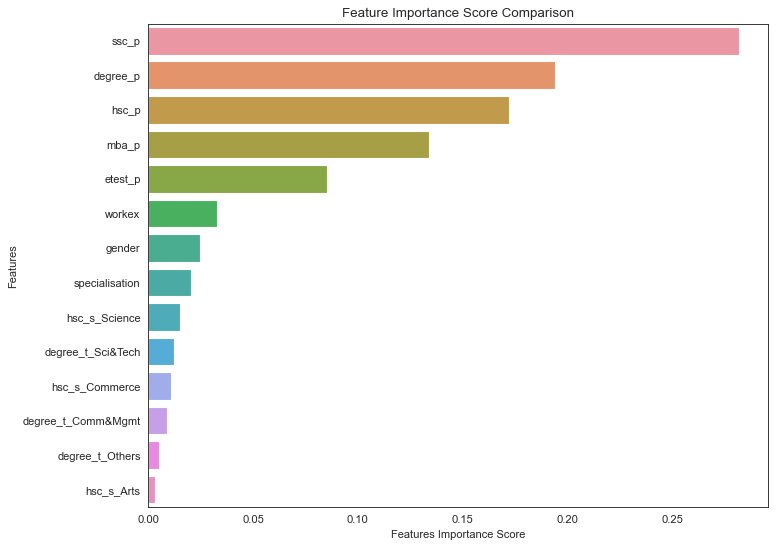

In [29]:
plt.figure(figsize=(10, 8), dpi=80)
sns.barplot(x="Features Importance Score", y="Features", data=feature_imp)
plt.title("Feature Importance Score Comparison")